# Technical indicators 
    This notebook calculates all the technical indicators for a given set of data 

In [6]:
#Import libraries 
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# get data 
chart_data = pd.read_csv('sample-data/test-data.csv', header=[0], index_col=[0], parse_dates=[0])
# Drop the all "ask" prices
chart_data = chart_data.drop(columns=['ask','ask.1', 'ask.2', 'ask.3'])

# Rename the headers
chart_data.rename(columns = {'bid':'Open', 'bid.1':'High', 'bid.2':'Low', 'bid.3':'Close'}, inplace =True)

# Drop the first row of data 
prices=chart_data.drop(chart_data.index[0])

prices.head()

,Open,High,Low,Close
30/12/2022 12:00,33102.4,33113.9,33069.9,33079.4
30/12/2022 13:00,33078.9,33086.9,33043.9,33067.4
30/12/2022 14:00,33066.9,33107.5,32909,32993
30/12/2022 15:00,32993.5,33074.5,32930,32977
30/12/2022 16:00,32977.5,33016.6,32907.5,33002.6


# Moving average 
50 point and 200 point moving averages 

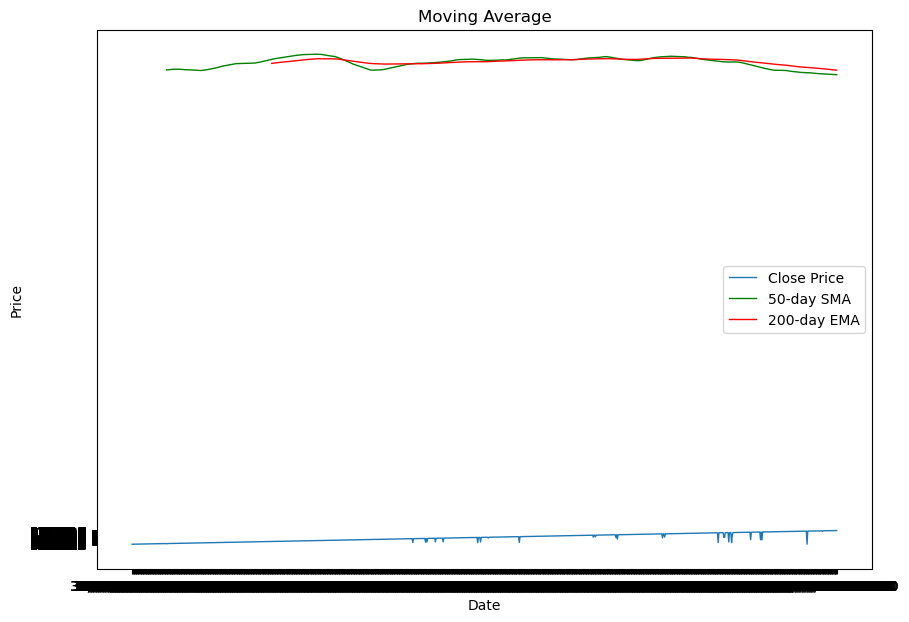

                     Open     High      Low    Close  MiddleBand  UpperBand  \
30/12/2022 12:00  33102.4  33113.9  33069.9  33079.4         NaN        NaN   
30/12/2022 13:00  33078.9  33086.9  33043.9  33067.4         NaN        NaN   
30/12/2022 14:00  33066.9  33107.5    32909    32993         NaN        NaN   
30/12/2022 15:00  32993.5  33074.5    32930    32977         NaN        NaN   
30/12/2022 16:00  32977.5  33016.6  32907.5  33002.6         NaN        NaN   

                  LowerBand  
30/12/2022 12:00        NaN  
30/12/2022 13:00        NaN  
30/12/2022 14:00        NaN  
30/12/2022 15:00        NaN  
30/12/2022 16:00        NaN  


In [12]:
# Simple Moving Average 
def SMA(prices, ndays): 
    SMA = pd.Series(prices['Close'].rolling(ndays).mean(), name = 'SMA') 
    prices = prices.join(SMA) 
    return prices

# Exponentially-weighted Moving Average 
def EWMA(prices, ndays): 
    EMA = pd.Series(prices['Close'].ewm(span = ndays, min_periods = ndays - 1).mean(), 
                 name = 'EWMA_' + str(ndays)) 
    prices = prices.join(EMA) 
    return prices

close = prices['Close']

# Compute the 50-day SMA
n = 50
SMA = SMA(prices,n)
SMA = SMA.dropna()
SMA = SMA['SMA']

# Compute the 200-day EWMA
ew = 200
EWMA = EWMA(prices,ew)
EWMA = EWMA.dropna()
EWMA = EWMA['EWMA_200']

# Plotting the stock Price Series chart and Moving Averages below
plt.figure(figsize=(10,7))

# Set the title and axis labels
plt.title('Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')

# Plot close price and moving averages
plt.plot(prices['Close'],lw=1, label='Close Price')
plt.plot(SMA,'g',lw=1, label='50-day SMA')
plt.plot(EWMA,'r', lw=1, label='200-day EMA')

# Add a legend to the axis
plt.legend()

plt.show()

print(prices.head())

# Bollinger Bands
Parameters for the prices

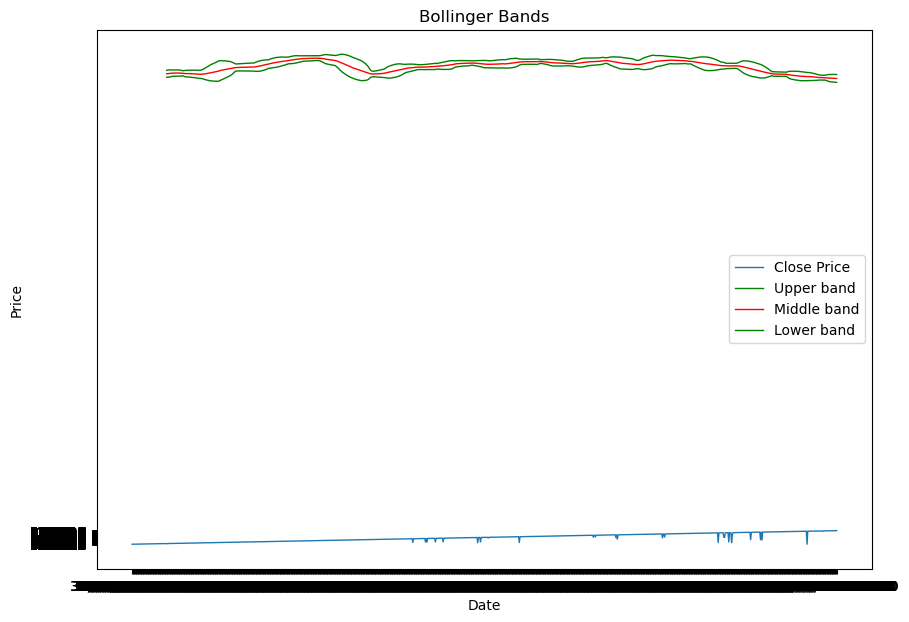

In [11]:
# Compute the Bollinger Bands 


def BBANDS(data, window=n):
    MA = data.Close.rolling(window=n).mean()
    SD = data.Close.rolling(window=n).std()
    data['MiddleBand'] = MA
    data['UpperBand'] = MA + (2 * SD) 
    data['LowerBand'] = MA - (2 * SD)
    return data
 
# Retrieve the Goolge stock data from Yahoo finance
data = prices

# Compute the Bollinger Bands for Google using the 50-day Moving average
n = 50
BBANDS = BBANDS(data, n)

# Create the plot
# pd.concat([BBANDS.Close, BBANDS.UpperBB, BBANDS.LowerBB],axis=1).plot(figsize=(9,5),)

plt.figure(figsize=(10,7))

# Set the title and axis labels
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')

plt.plot(BBANDS.Close,lw=1, label='Close Price')
plt.plot(data['UpperBand'],'g',lw=1, label='Upper band')
plt.plot(data['MiddleBand'],'r',lw=1, label='Middle band')
plt.plot(data['LowerBand'],'g', lw=1, label='Lower band')

# Add a legend to the axis
plt.legend()

plt.show()

# Relative strength index
RSi for short

In [14]:
# Returns RSI values
def rsi(close, periods = 14):
    
    close_delta = close.diff()

    # Make two series: one for lower closes and one for higher closes
    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)
    
    ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()

    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))
    return rsi


# Retrieve the Apple Inc. data from Yahoo finance
data = prices

# Call RSI function from the talib library to calculate RSI
data['RSI'] = rsi(data['Close'])

# Plotting the Price Series chart and the RSI below
fig = plt.figure(figsize=(10, 7))

# Define position of 1st subplot
ax = fig.add_subplot(2, 1, 1)

# Set the title and axis labels
plt.title('Apple Price Chart')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.plot(data['Close'], label='Close price')

# Add a legend to the axis
plt.legend()

# Define position of 2nd subplot
bx = fig.add_subplot(2, 1, 2)

# Set the title and axis labels
plt.title('Relative Strength Index')
plt.xlabel('Date')
plt.ylabel('RSI values')

plt.plot(data['RSI'], 'm', label='RSI')

# Add a legend to the axis
plt.legend()

plt.tight_layout()
plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'str'